In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#load clean data
economic_df = pd.read_csv(r"C:\Users\Abhin\OneDrive\Documents\[01] Projects\Portfolio projects\Finanace_Economics_dataset_2000_to_Present\archive (1)\economic_data_clean.csv", index_col=0, parse_dates=True)
market_df = pd.read_csv(r"C:\Users\Abhin\OneDrive\Documents\[01] Projects\Portfolio projects\Finanace_Economics_dataset_2000_to_Present\archive (1)\market_data_clean.csv", index_col=0, parse_dates=True)

print(f'Economic data: {economic_df.shape}')
print(f'Market data: {market_df.shape}')
print(f'Date range: {economic_df.index.min()} to {economic_df.index.max()}')

Economic data: (6796, 7)
Market data: (12930, 8)
Date range: 2000-01-01 00:00:00 to 2025-09-16 00:00:00


In [11]:
#Correlation analysis
print("\nCORRELATION ANALYSIS")

# remove timezone from market data upfront
market_clean = market_df.copy()
market_clean.index = market_clean.index.tz_localize(None)  # Remove timezone

market_monthly = market_clean.resample('M').last()
economic_monthly = economic_df.resample('M').last()

# Create the analysis DataFrame 
analysis_df = pd.DataFrame({
    'SP500_Returns': market_monthly['SP500'].pct_change() * 100,
    'NASDAQ_Returns': market_monthly['NASDAQ'].pct_change() * 100,
    'VIX_Level': economic_monthly['VIX_Volatility'],
    'Unemployment_Rate': economic_monthly['Unemployment_Rate'],
    'Fed_Funds_Rate': economic_monthly['Federal_Funds_Rate'],
    'Treasury_10Y': economic_monthly['Treasury_10Y']
}).dropna()

print(f"Analysis dataset created: {analysis_df.shape}")
print(f"Date range: {analysis_df.index.min()} to {analysis_df.index.max()}")

# Quick preview
print("\nFirst 5 rows:")
analysis_df.head()


CORRELATION ANALYSIS
Analysis dataset created: (307, 6)
Date range: 2000-02-29 00:00:00 to 2025-08-31 00:00:00

First 5 rows:


,SP500_Returns,NASDAQ_Returns,VIX_Level,Unemployment_Rate,Fed_Funds_Rate,Treasury_10Y
2000-02-29,-2.010808,19.194737,23.37,4.1,5.73,6.42
2000-03-31,9.671983,-2.637174,24.11,4.0,5.85,6.03
2000-04-30,-3.079576,-15.573948,26.20,3.8,6.02,6.23
2000-05-31,-2.191505,-11.908586,23.65,4.0,6.27,6.29
2000-06-30,2.393355,16.619088,19.54,4.0,6.53,6.03



Correlation Matrix Analysis
Correlation Matrix (values):
                   SP500_Returns  NASDAQ_Returns  VIX_Level  \
SP500_Returns              1.000           0.867     -0.442   
NASDAQ_Returns             0.867           1.000     -0.347   
VIX_Level                 -0.442          -0.347      1.000   
Unemployment_Rate          0.128           0.143      0.305   
Fed_Funds_Rate            -0.042          -0.085     -0.167   
Treasury_10Y              -0.097          -0.124     -0.053   

                   Unemployment_Rate  Fed_Funds_Rate  Treasury_10Y  
SP500_Returns                  0.128          -0.042        -0.097  
NASDAQ_Returns                 0.143          -0.085        -0.124  
VIX_Level                      0.305          -0.167        -0.053  
Unemployment_Rate              1.000          -0.600        -0.318  
Fed_Funds_Rate                -0.600           1.000         0.753  
Treasury_10Y                  -0.318           0.753         1.000  


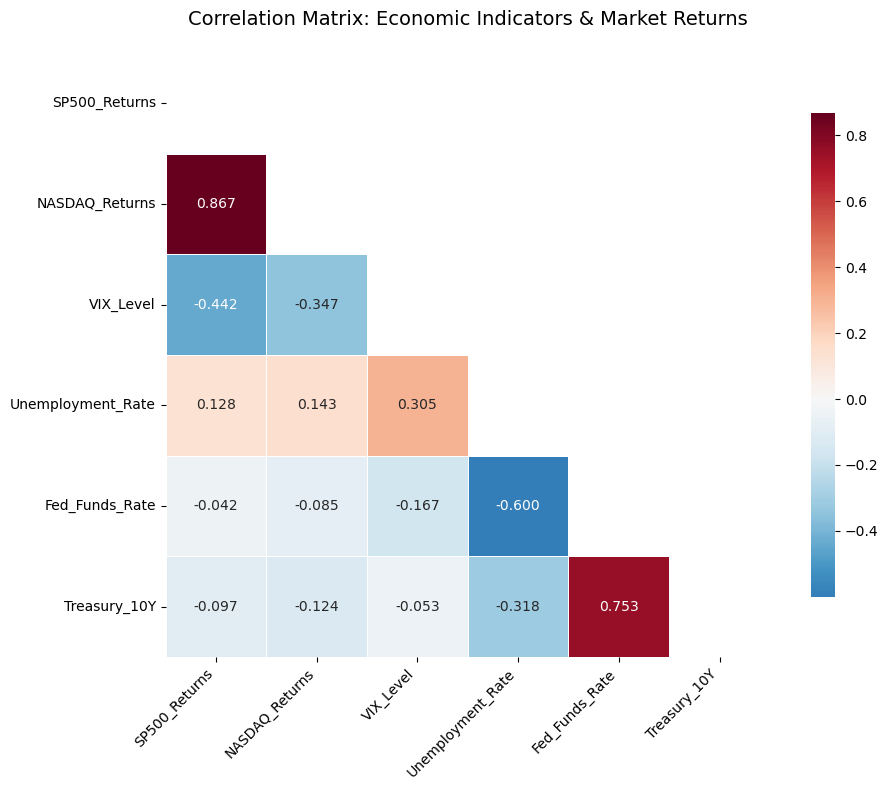

In [16]:
#Correlation matrix analysis
print('\nCorrelation Matrix Analysis')

#calculate correlation matrix
correlation_matrix = analysis_df.corr()
print('Correlation Matrix (values):')
print(correlation_matrix.round(3))

#correlation heatmap
plt.figure(figsize=(10,8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#create the heatmap
sns.heatmap(correlation_matrix,
           annot=True,
           mask=mask,
           cmap='RdBu_r',
           center=0,
           square=True,
           fmt='.3f',
           cbar_kws={'shrink': .8},
           linewidths=0.5)

plt.title('Correlation Matrix: Economic Indicators & Market Returns', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
#Key important relationships
print('\nKey Financial Relationships:')

#define key relationships
key_relationships = [
    ('SP500_Returns', 'VIX_Level', 'Stock Returns vs Fear Index'),
    ('SP500_Returns', 'Unemployment_Rate', 'Stock Returns vs Unemployment'),
    ('SP500_Returns', 'Fed_Funds_Rate', 'Stock Returns vs Interest Rates'),
    ('VIX_Level', 'Unemployment_Rate', 'Market Fear vs Economic Health'),
    ('Fed_Funds_Rate', 'Treasury_10Y', 'Short vs Long-term Interest Rates'),
    ('NASDAQ_Returns', 'SP500_Returns', 'Tech vs Broad Market')
]

for var1, var2, description in key_relationships:
    if var1 in correlation_matrix.index and var2 in correlation_matrix.index:
        corr = correlation_matrix.loc[var1, var2]

        if abs(corr) > 0.7:
            strength = 'Very Strong'
        elif abs(corr) > 0.5:
            strength = 'Strong'
        elif abs(corr) > 0.3:
            strength = 'Moderate'
        else:
            strength = 'Weak'

        direction = 'Negative' if corr < 0 else 'Positive'

        print(f'{description}')
        print(f'    Correlation: {corr:.3f} (direction) {strength}')
        print()


Key Financial Relationships:
Stock Returns vs Fear Index
    Correlation: -0.442 (direction) Moderate

Stock Returns vs Unemployment
    Correlation: 0.128 (direction) Weak

Stock Returns vs Interest Rates
    Correlation: -0.042 (direction) Weak

Market Fear vs Economic Health
    Correlation: 0.305 (direction) Moderate

Short vs Long-term Interest Rates
    Correlation: 0.753 (direction) Very Strong

Tech vs Broad Market
    Correlation: 0.867 (direction) Very Strong



In [19]:
#saving analysis
analysis_df.to_csv('phase2_analysis_data.csv')
print(f"Saved analysis dataset: {analysis_df.shape}")

correlation_matrix.to_csv('phase2_correlation_matrix.csv')

#summary of key findings
key_findings = {
    'SP500_vs_VIX': correlation_matrix.loc['SP500_Returns', 'VIX_Level'],
    'SP500_vs_Unemployment': correlation_matrix.loc['SP500_Returns', 'Unemployment_Rate'],
    'SP500_vs_FedFunds': correlation_matrix.loc['SP500_Returns', 'Fed_Funds_Rate'],
    'VIX_vs_Unemployment': correlation_matrix.loc['VIX_Level', 'Unemployment_Rate'],
    'FedFunds_vs_Treasury': correlation_matrix.loc['Fed_Funds_Rate', 'Treasury_10Y'],
    'NASDAQ_vs_SP500': correlation_matrix.loc['NASDAQ_Returns', 'SP500_Returns']
}

# Convert to DataFrame and save
findings_df = pd.DataFrame([key_findings], index=['Correlation'])
findings_df.to_csv('phase2_key_findings.csv')

Saved analysis dataset: (307, 6)
